In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

# Changer le path vers le csv sur votre machine.
df = pd.read_csv('vehicules-circulation-2016.csv')

In [3]:
df.drop(['AN', 'NOSEQ_VEH', 'MRC'], 1, inplace=True)

In [4]:
print("---------------------------")
print("MOYENNE DES CYLINDRES PAR RÉGION")
print("---------------------------")
df.sort_values(['REG_ADM'], ascending=[True], inplace=True)
values = {'NB_CYL': 0,'NB_ESIEU_MAX':0,'CYL_VEH':0,'CYL_VEH':0,'PHYS_SEX':'X', 'PHYS_AGE': 0 }
df = df.fillna(values)
montreal = df.loc[df['REG_ADM'] == 'Montréal (06)']

region = df.groupby('REG_ADM') 

print(region['NB_CYL'].mean())


print(" ")
print ("MOYENNE DES ANNES DES MODELES AVEC ET SANS REGION")
print(" ")
print(df['ANNEE_MOD'].mean())
print(region['ANNEE_MOD'].mean())

print(" ")
print('MOYENNE DES AGES PAR REGION')
print(" ")
print(region['PHYS_AGE'].mean())

print("---------------------------")

---------------------------
MOYENNE DES CYLINDRES PAR RÉGION
---------------------------
REG_ADM
Abitibi-Témiscamingue (08)            4.251181
Bas-Saint-Laurent (01)                4.280787
Capitale-Nationale (03)               4.364762
Centre-du-Québec (17)                 4.401535
Chaudière-Appalaches (12)             4.283881
Côte-Nord (09)                        4.197552
Estrie (05)                           4.367224
Gaspésie–Îles-de-la-Madeleine (11)    4.248795
Lanaudière (14)                       4.410134
Laurentides (15)                      4.438089
Laval (13)                            4.572877
Mauricie (04)                         4.301294
Montréal (06)                         4.616118
Montérégie (16)                       4.546535
Nord-du-Québec (10)                   4.698918
Outaouais (07)                        4.513199
Saguenay–Lac-Saint-Jean (02)          4.207667
Name: NB_CYL, dtype: float64
 
MOYENNE DES ANNES DES MODELES AVEC ET SANS REGION
 
2008.0357052642767
RE

---------------------------
PROPORTION DE FEMMES
---------------------------


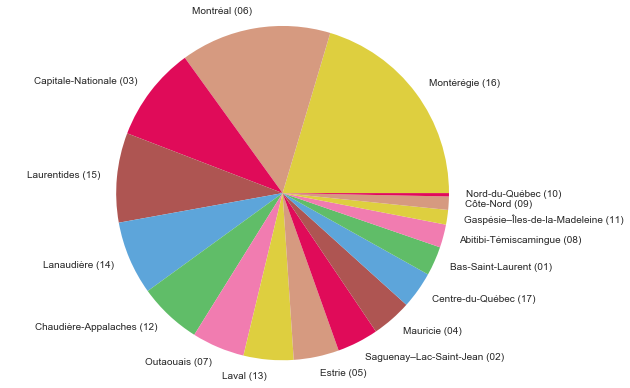

---------------------------
PROPORTION DES HOMMES
---------------------------


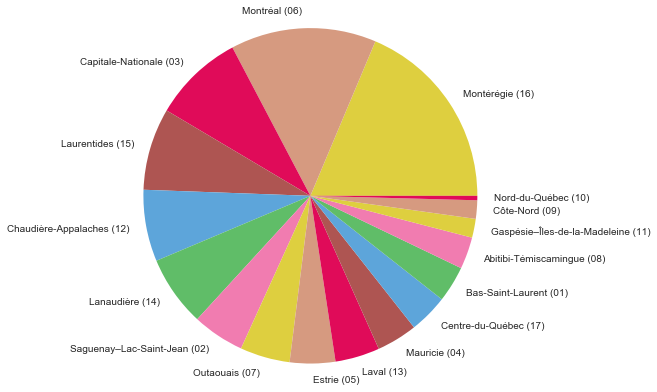

In [5]:
#region = df.groupby('REG_ADM') 
#propfemme =  femme / region['PHYS_SEX'].count() 
print("---------------------------")
print('PROPORTION DE FEMMES')
print("---------------------------")
femme = df.loc[(df["PHYS_SEX"]=="F"),"REG_ADM"].value_counts()
temp = pd.DataFrame({"Region":femme.index, "Mean":femme.values})

# Create a list of colors (from iWantHue)
colors = ["#DECF3F", "#D69A80", "#E00B59", "#AE5552", "#5DA5DA", "#60BD68", "#F17CB0"]

# Create a pie chart
plt.pie(
    temp['Mean'],
    labels=temp['Region'],
    shadow=False,
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()
#------------------------------------------

print("---------------------------")
print('PROPORTION DES HOMMES')
print("---------------------------")
homme = df.loc[(df["PHYS_SEX"]=="M"),"REG_ADM"].value_counts()
temp2 = pd.DataFrame({"Region":homme.index, "Mean":homme.values})

plt.pie(
    temp2['Mean'],
    labels=temp2['Region'],
    shadow=False,
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [6]:
dict_clas = {"PAU" : "Automobile ou camion léger", "PMC":"Motocyclette", "PCY":"Cyclomoteur", 
             "PHM" : "Habitation motorisée", "CAU":"Automobile ou camion léger", "CMC":"Motocyclette", "CCY":"Cyclomoteur",
              "CHM":"Habitation motorisée", "TTA":"Taxi", "TAB":"Autobus", "TAS":"Autobus scolaire", 
              "BCA":"Camion ou tracteur routier", "CVO":"Véhicule-outil", "COT":"Autres"}
df["CLAS"].replace(dict_clas, inplace =True )

dict_typ_veh = {"AB": "Autobus","AT": "Aucun type spécifique", "AU":"Automobile ou camion léger",
                "CA":"Camion ou tracteur routier", "CY":"Cyclomoteur", "HM":"Habitation motorisée",
               "MN":"Motoneige", "NV": "Autres véhicules hors route", "SN":"Souffleuse à neige", "VO":"Véhicule-outil",
               "VT":"Véhicule tout-terrain"}
df["TYP_VEH_CATEG_USA"].replace(dict_typ_veh, inplace=True)
df["TYP_VEH_CATEG_USA"].head()


149973     Automobile ou camion léger
5819649    Automobile ou camion léger
5100717    Automobile ou camion léger
5819653    Automobile ou camion léger
2727800    Automobile ou camion léger
Name: TYP_VEH_CATEG_USA, dtype: object

In [7]:
sMan = df.loc[(df["PHYS_SEX"]=="M"),"PHYS_AGE"].value_counts()
dfMan = pd.DataFrame({"Age":sMan.index, "Count":sMan.values})

In [8]:
print("Number of women per age",df.loc[(df["PHYS_SEX"]=="F"),"PHYS_AGE"].value_counts())

Number of women per age 53.0     48664
51.0     48396
52.0     48157
55.0     47171
54.0     47051
56.0     45934
50.0     44987
57.0     44776
58.0     43224
49.0     42424
59.0     41199
48.0     40630
46.0     39739
47.0     39729
45.0     39379
39.0     38563
36.0     38552
41.0     38424
38.0     38286
37.0     38286
60.0     38150
35.0     38127
40.0     37915
44.0     37431
61.0     37304
42.0     36992
34.0     36374
43.0     36149
62.0     34825
33.0     34491
         ...  
78.0      9890
79.0      8546
80.0      8143
81.0      7103
17.0      6175
82.0      6135
83.0      5575
84.0      4807
85.0      3826
86.0      3067
87.0      2355
16.0      1960
88.0      1818
89.0      1344
90.0       963
91.0       603
92.0       419
93.0       286
15.0       207
94.0       141
95.0       108
14.0        97
96.0        56
97.0        29
98.0        19
100.0       13
99.0         6
101.0        3
104.0        1
102.0        1
Name: PHYS_AGE, dtype: int64


In [9]:
print(df.groupby("PHYS_SEX")["PHYS_AGE"].count())


PHYS_SEX
F    2032622
M    3477054
X     906673
Name: PHYS_AGE, dtype: int64


In [10]:
s1 = dfMan.query('Age > 13 & Age < 26')
s2 = dfMan.query('Age > 25 & Age < 36')
s3 = dfMan.query('Age > 35 & Age < 46')
s4 = dfMan.query('Age > 45 & Age < 56')
s5 = dfMan.query('Age > 55 & Age < 66')
s6 = dfMan.query('Age > 65 & Age < 76')
s7 = dfMan.query('Age > 75')

s1=s1['Count'].sum()
s2=s2['Count'].sum()
s3=s3['Count'].sum()
s4=s4['Count'].sum()
s5=s5['Count'].sum()
s6=s6['Count'].sum()
s7=s7['Count'].sum()

raw_data = {'Count': [s1, s2, s3, s4, s5, s6, s7],'Interval_Age': ['14-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']}
dfTest2 = pd.DataFrame(raw_data, columns = ['Count', 'Interval_Age'])


print(dfTest2)

    Count Interval_Age
0  256367        14-25
1  473502        26-35
2  604501        36-45
3  777488        46-55
4  743135        56-65
5  442973        66-75
6  179088          76+


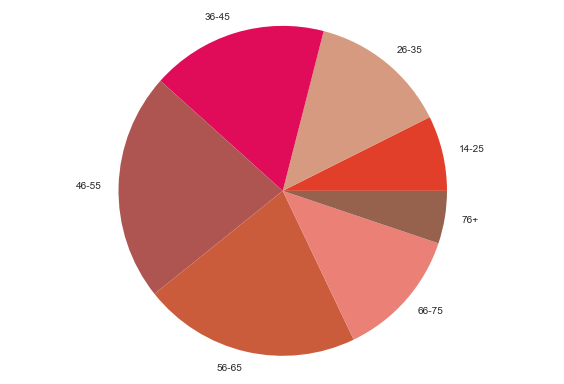

In [11]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#E00B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    dfTest2['Count'],
    # with the labels being officer names
    labels=dfTest2['Interval_Age'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

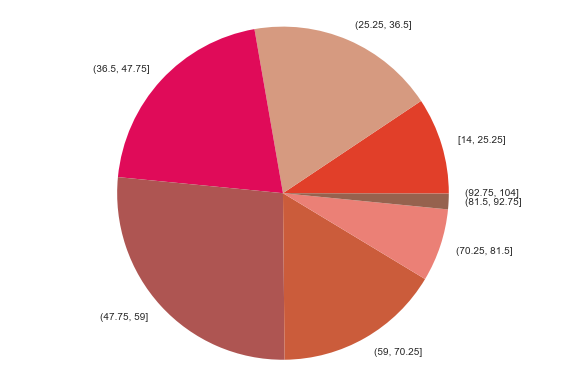

In [12]:
swoMan = df.loc[(df["PHYS_SEX"]=="F"),"PHYS_AGE"].value_counts()
dfwoMan = pd.DataFrame({"Age":swoMan.index, "Count":swoMan.values})


#Code Younes avec Min et Max
# Bin the data frame by "a" with 10 bins...
bins = np.linspace(dfwoMan.Age.min(), dfwoMan.Age.max(),9)
groups = dfwoMan.groupby(pd.cut(dfwoMan.Age, bins, include_lowest=True))
swoManIntervals = groups.sum().Count
dfwoManIntervals = pd.DataFrame({"Age":swoManIntervals.index, "Count":swoManIntervals.values})


# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#E00B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    dfwoManIntervals['Count'],
    # with the labels being officer names
    labels=dfwoManIntervals['Age'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [13]:
swoMan = df.loc[(df["PHYS_SEX"]=="F"),"PHYS_AGE"].value_counts()
dfwoman = pd.DataFrame({"Age":swoMan.index, "Count":swoMan.values})

s1 = dfwoman.query('Age > 13 & Age < 26')
s2 = dfwoman.query('Age > 25 & Age < 36')
s3 = dfwoman.query('Age > 35 & Age < 46')
s4 = dfwoman.query('Age > 45 & Age < 56')
s5 = dfwoman.query('Age > 55 & Age < 66')
s6 = dfwoman.query('Age > 65 & Age < 76')
s7 = dfwoman.query('Age > 75')

s1=s1['Count'].sum()
s2=s2['Count'].sum()
s3=s3['Count'].sum()
s4=s4['Count'].sum()
s5=s5['Count'].sum()
s6=s6['Count'].sum()
s7=s7['Count'].sum()

raw_data = {'Count': [s1, s2, s3, s4, s5, s6, s7],'Interval_Age': ['14-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']}
dfTest2 = pd.DataFrame(raw_data, columns = ['Count', 'Interval_Age'])


print(dfTest2)

    Count Interval_Age
0  189842        14-25
1  335733        26-35
2  379977        36-45
3  446948        46-55
4  377574        56-65
5  213780        66-75
6   88768          76+


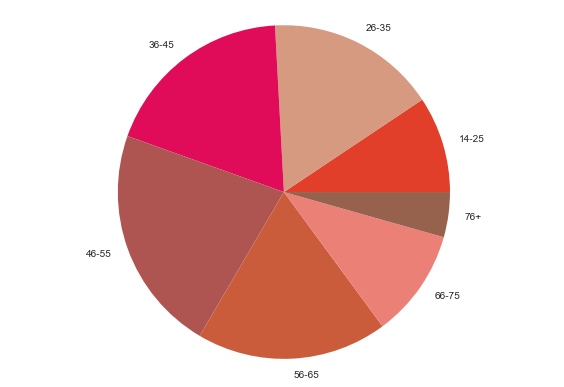

In [15]:

# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#E00B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    dfTest2['Count'],
    # with the labels being officer names
    labels=dfTest2['Interval_Age'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [26]:
# POUR CALCULER LE NOMBRE DE VÉHICULE PAR PERSONNE DE 15 ANS ET PLUS
statpop_15ans = pd.Series({"Bas-Saint-Laurent (01)":172433, "Saguenay–Lac-Saint-Jean (02)":236959,
                           "Capitale-Nationale (03)": 632843, "Mauricie (04)": 232881, "Estrie (05)":274839, 
                           "Montréal (06)": 1709397, "Outaouais (07)" : 324790, "Abitibi-Témiscamingue (08)":123669, 
                           "Côte-Nord (09)": 77840, "Nord-du-Québec (10)": 33173, "Gaspésie–Îles-de-la-Madeleine (11)":80840,
                           "Chaudière-Appalaches (12)":357479, "Laval (13)":357684, "Lanaudière (14)":418899,
                           "Laurentides (15)": 506613, "Montérégie (16)": 1284705, "Centre-du-Québec (17)":205525})
nbreVPersonnelles = df.query("TYP_DOSS_PERS == 'P'").groupby("REG_ADM")["TYP_DOSS_PERS"].count()
nbreVCommercials = df.query("TYP_DOSS_PERS == 'M'").groupby("REG_ADM")["TYP_DOSS_PERS"].count()
ratio = pd.concat([statpop_15ans, nbreVPersonnelles, nbreVCommercials], axis=1)
ratio.columns = ["Pop.", "Véhicules de promenades", "Véhicules commercials"]
ratio["Véhicules de promenades par p."]= (ratio["Véhicules de promenades"]/ratio["Pop."]).round(2)
ratio["Véhicules de commercials par p."] = (ratio["Véhicules commercials"]/ratio["Pop."]).round(2)
ratio["Total par p."] = ((ratio["Véhicules de promenades"]+ratio["Véhicules commercials"]) /ratio["Pop."]).round(2)
ratio.ix[:,["Pop.", "Véhicules de promenades par p.", "Véhicules de promenades par p.","Total par p."]]

,Pop.,Véhicules de promenades par p.,Véhicules de promenades par p.,Total par p.
REG_ADM,,,,
Abitibi-Témiscamingue (08),123669,1.23,1.23,1.43
Bas-Saint-Laurent (01),172433,1.04,1.04,1.21
Capitale-Nationale (03),632843,0.78,0.78,0.92
Centre-du-Québec (17),205525,0.99,0.99,1.18
Chaudière-Appalaches (12),357479,1.02,1.02,1.20
Côte-Nord (09),77840,1.13,1.13,1.27
Estrie (05),274839,0.88,0.88,1.01
Gaspésie–Îles-de-la-Madeleine (11),80840,1.14,1.14,1.26
Lanaudière (14),418899,0.91,0.91,1.03


In [22]:
popByAge = pd.read_csv("age_et_sexe1.csv")

CParserError: Error tokenizing data. C error: Expected 24 fields in line 1079, saw 26
